
# Human Activity Recognition with Smartphones

# Chinmayee Nayak

# Understanding the data

# Introduction:
I recently completed a project on Human Activity Recognition using smartphone sensor data. 
This technology has broad applications, from medical research to human survey systems. 
In this project, I aimed to build a model that can accurately predict human activities based on sensor data collected from smartphones worn by individuals.

# Description

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing and Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors Accelerometer and Gyroscope in that smartphone.

# Data Loading and Exploration:
To start, I imported the necessary libraries, including pandas, numpy, seaborn, matplotlib, and scikit-learn. 
I loaded the training and testing datasets using pandas.

# Importing Necessary Packages¶

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Loading the Train and Test Data

In [3]:
train = pd.read_csv("C:\\Users\\nchin\\Desktop\\train.csv")

In [4]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [5]:
test=pd.read_csv("C:\\Users\\nchin\\Desktop\\test.csv")


In [6]:
test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [7]:
train.shape    # checking the number of rows and columns

(7352, 563)

In [8]:
test.shape     # checking the number of rows and columns

(2947, 563)

# Data Overview:
The training data contains 7352 rows and 563 columns, while the testing data has 2947 rows and 563 columns. 
These columns represent different sensor measurements, making it a rich dataset for analysis.

In [9]:
train.isnull().sum().any()   # checking the number of missing values
#Observation: There are no missing values in train and test data

False

In [10]:
train.dtypes.value_counts()  # checking the datatype of the columns

float64    561
int64        1
object       1
Name: count, dtype: int64

In [11]:
test.dtypes.value_counts() # checking the datatype of the columns

float64    561
int64        1
object       1
Name: count, dtype: int64

In [12]:
train['Activity'].value_counts() # Checking the number of records for each labels

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

Understanding the data is crucial. I began by calculating the duration of each activity for each subject. This helped me understand how long each person spent on different activities, such as walking, sitting, standing, and more.

In [13]:
# we are going to count how many sensor measurments are there for each activity for each partcipant

pivoted=train.pivot_table(index="subject",columns="Activity",aggfunc='count').iloc[:,:6]
count_df=pd.DataFrame(pivoted.to_records())  #convert pivot table to dataframe
count_df=count_df.set_index ("subject")      # Change the index
count_df.columns =["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
count_df

LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
subject                                                           
1            50       47        53       95                  49   
3            62       52        61       58                  49   
5            52       44        56       56                  47   
6            57       55        57       57                  48   
7            52       48        53       57                  47   
8            54       46        54       48                  38   
11           57       53        47       59                  46   
14           51       54        60       59                  45   
15           72       59        53       54                  42   
16           70       69        78       51                  47   
17           71       64        78       61                  46   
19           83       73        73       52                  39   
21           90       85        89       52                  45   
22           72       62        63       46                  36   
23           72       68        68       59                  54   
25           73       65        74       74                  58   
26           76       78        74       59                  50   
27           74       70        80       57                  44   
28           80       72        79       54                  46   
29           69       60        65       53                  48   
30           70       62        59       65                  62   

         WALKING_UPSTAIRS  
subject                    
1                      53  
3                      59  
5                      47  
6                      51  
7                      51  
8                      41  
11                     54  
14                     54  
15                     48  
16                     51  
17                     48  
19                     40  
21                     47  
22                     42  
23                     51  
25                     65  
26                     55  
27                     51  
28                     51  
29                     49  
30                     65

In [17]:
# SAMPLING IS DONE AT 1.28 SECONDS,SO THE TOTAL DURATION FOR ALL THE ACTIONS WILL BE COUNT 8 1.28
# THIS IS A SAMPLE ,WHICH IS WHY THE DURATION IS QUIET LESS.IF A PERSON WEARS THE TRACKER FOR THE ACTIVITIES
# YOU CAN MEASURE HOW MANY HOURS HE WALKS,SLEEPS,SITS..ETC..

duration_df=count_df * 1.28
duration_df

LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
subject                                                           
1         64.00    60.16     67.84   121.60               62.72   
3         79.36    66.56     78.08    74.24               62.72   
5         66.56    56.32     71.68    71.68               60.16   
6         72.96    70.40     72.96    72.96               61.44   
7         66.56    61.44     67.84    72.96               60.16   
8         69.12    58.88     69.12    61.44               48.64   
11        72.96    67.84     60.16    75.52               58.88   
14        65.28    69.12     76.80    75.52               57.60   
15        92.16    75.52     67.84    69.12               53.76   
16        89.60    88.32     99.84    65.28               60.16   
17        90.88    81.92     99.84    78.08               58.88   
19       106.24    93.44     93.44    66.56               49.92   
21       115.20   108.80    113.92    66.56               57.60   
22        92.16    79.36     80.64    58.88               46.08   
23        92.16    87.04     87.04    75.52               69.12   
25        93.44    83.20     94.72    94.72               74.24   
26        97.28    99.84     94.72    75.52               64.00   
27        94.72    89.60    102.40    72.96               56.32   
28       102.40    92.16    101.12    69.12               58.88   
29        88.32    76.80     83.20    67.84               61.44   
30        89.60    79.36     75.52    83.20               79.36   

         WALKING_UPSTAIRS  
subject                    
1                   67.84  
3                   75.52  
5                   60.16  
6                   65.28  
7                   65.28  
8                   52.48  
11                  69.12  
14                  69.12  
15                  61.44  
16                  65.28  
17                  61.44  
19                  51.20  
21                  60.16  
22                  53.76  
23                  65.28  
25                  83.20  
26                  70.40  
27                  65.28  
28                  65.28  
29                  62.72  
30                  83.20

# Active and Passive States:
I introduced the concept of active and passive states by calculating the durations of activities like walking, walking upstairs, and walking downstairs as "active" states and activities like sitting, standing, and laying as "passive" states.

In [18]:
# Feature Engineering : Creating new columns,active and passive
duration_df['active']= duration_df['WALKING']+duration_df['WALKING_UPSTAIRS']+duration_df['WALKING_DOWNSTAIRS']
duration_df['passive']=duration_df['LAYING']+duration_df['SITTING']+duration_df['STANDING']

In [19]:
duration_df

LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
subject                                                           
1         64.00    60.16     67.84   121.60               62.72   
3         79.36    66.56     78.08    74.24               62.72   
5         66.56    56.32     71.68    71.68               60.16   
6         72.96    70.40     72.96    72.96               61.44   
7         66.56    61.44     67.84    72.96               60.16   
8         69.12    58.88     69.12    61.44               48.64   
11        72.96    67.84     60.16    75.52               58.88   
14        65.28    69.12     76.80    75.52               57.60   
15        92.16    75.52     67.84    69.12               53.76   
16        89.60    88.32     99.84    65.28               60.16   
17        90.88    81.92     99.84    78.08               58.88   
19       106.24    93.44     93.44    66.56               49.92   
21       115.20   108.80    113.92    66.56               57.60   
22        92.16    79.36     80.64    58.88               46.08   
23        92.16    87.04     87.04    75.52               69.12   
25        93.44    83.20     94.72    94.72               74.24   
26        97.28    99.84     94.72    75.52               64.00   
27        94.72    89.60    102.40    72.96               56.32   
28       102.40    92.16    101.12    69.12               58.88   
29        88.32    76.80     83.20    67.84               61.44   
30        89.60    79.36     75.52    83.20               79.36   

         WALKING_UPSTAIRS  active  passive  
subject                                     
1                   67.84  252.16   192.00  
3                   75.52  212.48   224.00  
5                   60.16  192.00   194.56  
6                   65.28  199.68   216.32  
7                   65.28  198.40   195.84  
8                   52.48  162.56   197.12  
11                  69.12  203.52   200.96  
14                  69.12  202.24   211.20  
15                  61.44  184.32   235.52  
16                  65.28  190.72   277.76  
17                  61.44  198.40   272.64  
19                  51.20  167.68   293.12  
21                  60.16  184.32   337.92  
22                  53.76  158.72   252.16  
23                  65.28  209.92   266.24  
25                  83.20  252.16   271.36  
26                  70.40  209.92   291.84  
27                  65.28  194.56   286.72  
28                  65.28  193.28   295.68  
29                  62.72  192.00   248.32  
30                  83.20  245.76   244.48

# Data Visualization:


<Axes: xlabel='subject', ylabel='LAYING'>

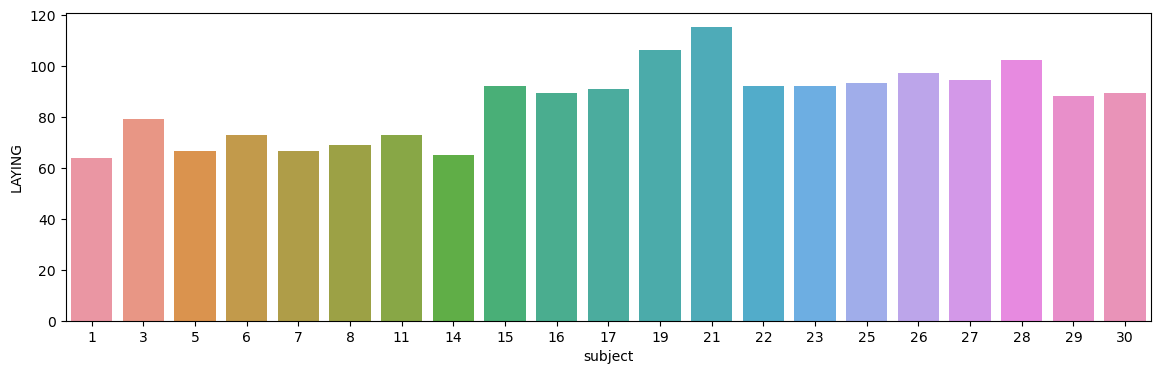

In [20]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df.index,y=duration_df.LAYING)

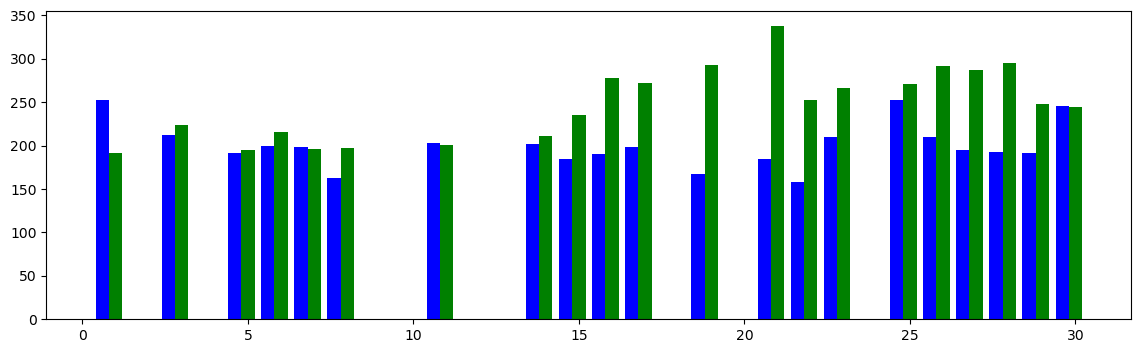

In [21]:
x=duration_df.index
plt.figure(figsize=(14,4))
ax=plt.subplot(111)
ax.bar(x-0.4, duration_df.active, width=0.4, color='b', align='center')
ax.bar(x, duration_df.passive, width=0.4, color='g', align='center')
plt.show()

<Axes: xlabel='subject', ylabel='WALKING'>

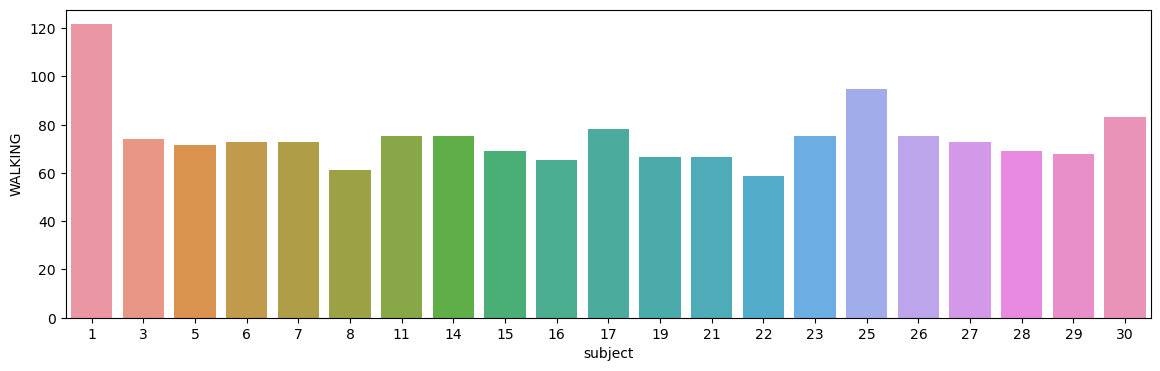

In [22]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df.index,y=duration_df.WALKING)

# MODEL BUILDING

In [23]:
x_train=train.drop(['Activity','subject'],axis=1)
y_train=train['Activity']

In [24]:
x_train.shape

(7352, 561)

In [25]:
y_train.shape

(7352,)

In [26]:
x_test=test.drop(['Activity','subject'],axis=1)
y_test=test['Activity']

In [27]:
# lets reduce the dimensions from 561 columns to 2 columns
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x_train)
principalDf = pd.DataFrame(principalComponents,columns=['pc1','pc2'])

In [28]:
principalDf.head()

pc1       pc2
0 -5.520280 -0.290276
1 -5.535350 -0.082529
2 -5.474988  0.287387
3 -5.677232  0.897031
4 -5.748749  1.162951

In [29]:
finalDf=pd.concat([principalDf,y_train],axis=1)

<Axes: xlabel='pc1', ylabel='pc2'>

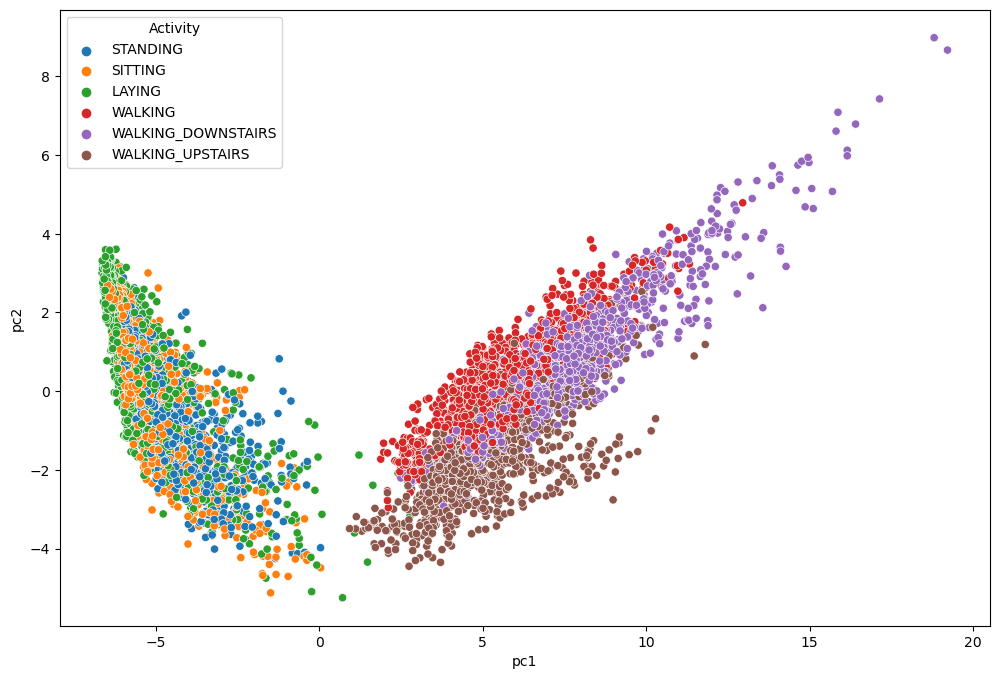

In [30]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='pc1',y='pc2',data=principalDf,hue=y_train)

# EDA for 3D plot

# 3D Data Visualization:
Additionally, I used PCA to reduce the data to three principal components for 3D visualization. 
This allowed me to see the distribution of activities in a 3D space, revealing even more about the data.

In [31]:
from sklearn .decomposition import PCA
pca = PCA(n_components=3)
principalComponents=pca.fit_transform(x_train)
principalDf=pd.DataFrame(principalComponents,columns=['pc1','pc2','pc3'])

In [32]:
principalDf.head()

pc1       pc2       pc3
0 -5.520280 -0.290278 -1.529928
1 -5.535350 -0.082530 -1.924804
2 -5.474988  0.287387 -2.144641
3 -5.677232  0.897031 -2.018219
4 -5.748749  1.162952 -2.139534

In [33]:
finalDf=pd.concat([principalDf,y_train],axis=1)

In [34]:
import plotly.express as px
fig=px.scatter_3d(finalDf,x="pc1",y="pc2",z="pc3",color="Activity",color_discrete_map={"pc1": "pc2","pc3":"green"})
fig.show()

# Decision Tree Classifier¶

#Model Building:
For the classification task, I used a Decision Tree Classifier from scikit-learn. 
This is a machine learning algorithm that can classify activities based on sensor data.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()

In [42]:
dt_clf.fit(x_train,y_train)  #fit the model in train 

DecisionTreeClassifier()

In [43]:
y_pred=dt_clf.predict(x_test) #make predictions on test data

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_pred,y_test)

In [45]:
print(cm)

[[537   0   0   0   0   0]
 [  0 373  78   0   0   0]
 [  0 118 454   0   0   0]
 [  0   0   0 449  21  68]
 [  0   0   0  17 348  37]
 [  0   0   0  30  51 366]]


In [46]:
cr=classification_report(y_pred,y_test)
print(cr)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.76      0.83      0.79       451
          STANDING       0.85      0.79      0.82       572
           WALKING       0.91      0.83      0.87       538
WALKING_DOWNSTAIRS       0.83      0.87      0.85       402
  WALKING_UPSTAIRS       0.78      0.82      0.80       447

          accuracy                           0.86      2947
         macro avg       0.85      0.86      0.85      2947
      weighted avg       0.86      0.86      0.86      2947



In [47]:
print(accuracy_score(y_pred,y_test))

0.8574821852731591


# Model Evaluation:
I evaluated the model using standard classification metrics, including a confusion matrix and a classification report. 
The model's accuracy score was approximately 85.75%, indicating that it can predict activities with high accuracy.

# Conclusion

Human  activity  recognition  has  broad  applications  in medical research and human survey system. 
In this project, we  designed  a  smartphone-based  recognition  system  that recognizes five human activities: walking, limping, jogging, going upstairs and going downstairs. 
The activity data were trained and tested using  PCA , Decision Tree algorithm and Confusion Matrix . 
The best  classification  rate  in our experiment  accuracy_score was 0.8574821852731591

This project demonstrates the potential of using machine learning to recognize human activities based on smartphone data. 
It has applications in various fields, including healthcare, fitness tracking, and more.